In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
path='tests_small/'
filename='noisy_projections_new.top'

fov=60
px=512
scale=fov/px

In [19]:
energy_contr=[]

energies=[]
deviations=[]

atomarray=[]
seenarray=[]
for subdir, dirs, files in sorted(os.walk(path)):
    for file in files:
        if file==filename:
            f=os.path.join(subdir, file)
            print('reading '+f)
            chapter=-1
            ats=[[],[]]
            seens=[[],[]]

            with open(f,'r') as inp:
                for line in inp:
                    splitline=line.strip().split('\t')
                    if line.startswith('#ENERGY_CONTRIBUTION'):
                        ec=int(splitline[1])/100
                        energy_contr.append(ec)
                        continue                        
                    if line.startswith('#ENERGY'):       
                        en=float(splitline[1])
                        energies.append(en)
                        print(str(ec)+'\t'+str(en))
                        
                    if line.startswith('#DEVIATION'):     
                        dev=float(splitline[1])
                        deviations.append(dev)
                        continue
                        
                    if line.startswith('VIEW'):
                        chapter+=1
                        continue
                    if line.startswith('ATOM'):
                        if chapter!=-1:
                            if int(splitline[1])>=0:
                                ats[chapter].append(
                                    [float(splitline[2]),float(splitline[3])])
                    if line.startswith('SEEN'):
                        if chapter!=-1:
                            if int(splitline[1])>=0:
                                if float(splitline[2])==0 and float(splitline[3])==0:
                                    del ats[chapter][-1]
                                    continue
                                    
                                seens[chapter].append(
                                    [float(splitline[2]),float(splitline[3])])
                            
            atomarray.append(ats)
            seenarray.append(seens)
            
atomarray=np.array(atomarray)*scale
seenarray=np.array(seenarray)*scale
deviations=np.sqrt(deviations)


reading tests_small/noisy_projections_new.top
reading tests_small/001/noisy_projections_new.top
0.01	-6.622988943096031
reading tests_small/003/noisy_projections_new.top
0.03	-6.672033893699456
reading tests_small/005/noisy_projections_new.top
0.05	-6.709408679452144
reading tests_small/007/noisy_projections_new.top
0.07	-6.739152870069515
reading tests_small/010/noisy_projections_new.top
0.1	-6.773674600707004
reading tests_small/015/noisy_projections_new.top
0.15	-6.812706147838455
reading tests_small/020/noisy_projections_new.top
0.2	-6.838730450106461
reading tests_small/030/noisy_projections_new.top
0.3	-6.871356873641532
reading tests_small/040/noisy_projections_new.top
0.4	-6.892206749649044
reading tests_small/050/noisy_projections_new.top
0.5	-6.907796196177166
reading tests_small/060/noisy_projections_new.top
0.6	-6.920774655754858
reading tests_small/070/noisy_projections_new.top
0.7	-6.932331548225432
reading tests_small/080/noisy_projections_new.top
0.8	-6.943029799684184


ValueError: x and y must have same first dimension, but have shapes (20,) and (19,)

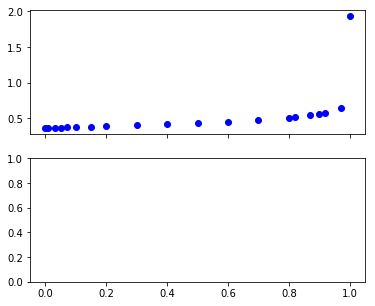

In [20]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(6,5))
ax.plot(energy_contr,deviations,'bo')
ax2.plot(energy_contr,energies,'ro')



# zoom-in / limit the view to different portions of the data
offset=0.05
ax.set_ylim(np.min(deviations)-offset, np.max(deviations[:-1])+offset)  # outliers only
ax2.set_ylim(np.min(energies)-offset, np.max(energies[:-1])+offset)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

In [39]:
## forceplot (vectorplot)

#f=plt.figure(figsize=(8,6))

for i in range(atomarray.shape[0]):
    atoms=np.array(atomarray[i][1]) ### energy 100, view 2
    seens=np.array(seenarray[i][1])

    deviationvector=np.sqrt(np.sum((np.sum((seens-atoms),axis=0))**2))
    print('average deviation vector per atom:\t'+str(deviationvector))
    #plt.plot(atoms[:,0],atoms[:,1],'bo',ms=3)
    #plt.plot(seens[:,0],seens[:,1],'ro',ms=3)
#plt.quiver(atoms[:,0],atoms[:,1],seens[:,0]-atoms[:,0],seens[:,1]-atoms[:,1],
#           scale=1,angles="xy", scale_units="xy")
#plt.show()

average deviation vector per atom:	9.73700533304782e-05
average deviation vector per atom:	0.0011713347994577689
average deviation vector per atom:	0.0011902943347433927
average deviation vector per atom:	0.0015756686010751223
average deviation vector per atom:	0.0014262534612927236
average deviation vector per atom:	5.072752432492768e-06
average deviation vector per atom:	0.0015911676265757302
average deviation vector per atom:	4.449692413034147e-06
average deviation vector per atom:	5.222244392071072e-06
average deviation vector per atom:	8.866759868007447e-06
average deviation vector per atom:	2.638539173264373e-05
average deviation vector per atom:	1.9686745663573572e-05
average deviation vector per atom:	1.645313055861676e-05
average deviation vector per atom:	0.0005337113591836374
average deviation vector per atom:	0.03315155560808351
average deviation vector per atom:	0.11325778208590341
average deviation vector per atom:	0.00036845402874729837
average deviation vector per atom:

In [33]:
atomarray.shape

(20, 2, 346, 2)

In [30]:
atoms.shape

(346, 2)

In [158]:
seens[aid,0]

108.05517275572653